# K-Nearest Neighbors and Naive Bayes
An implementation of the K-Nearest Neighbors and Naive Bayes algorithm for the digit recognition dataset. 

In [6]:
import pandas as pd
import numpy as np
import os
%matplotlib inline


/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 1. Import Training Set
Load each file and convert into a numpy vector (add it to a pandas dataframe).

There will be 1024 features (since the size is 32x32) for each digit followed by the digit label. The digit's label can be included from the file name.

In [7]:
"""Function to convert image to a vector"""
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
        
    return returnVect


### 1.a. Convert all files to a vector and create a dataframe

Convert the training and testing data to numpy arrays and create a dataframe.

In [8]:
"""Training data"""
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/'
files = os.listdir(path)
df_train = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_train.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_train[1024] = y
df_train = df_train.astype(int)


In [9]:
"""Test data"""
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/testDigits/'
files = os.listdir(path)
df_test = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_test.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_test[1024] = y
df_test = df_test.astype(int)


### 1.b. Show one sample from each as a binary image

Pick one random binary text file and convert it to a binary image. Store the file.

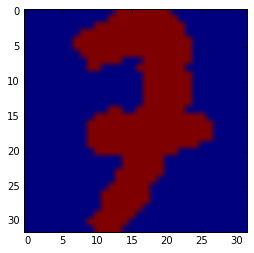

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
data = img2vector("/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/7_91.txt")
#fr = open("/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/7_91.txt")
data = data.reshape(32,32)
imgplot = plt.imshow(data)

## 2. K-Nearest Neighbor Classifier
We train a knn classifier on the training set that we imported in the previous step. We then find its trianing error on a range of k-values from 1 to 10. We then also use it on the testing set to make predictions and check the performance.

### 2.a. Prepare data for KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
X_train = df_train.loc[:,0:1023]
y_train = df_train.loc[:,1024]
X_test = df_test.loc[:,0:1023]
y_test = df_test.loc[:,1024]
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)
#print(type(y_train[0]))


### 2.b. knn on the training data set

In [102]:
%%time
train_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    acc = metrics.accuracy_score(y_train, y_pred)
    print acc
    train_accuracies.append(acc)
print("Mean accuracy : {}".format(np.mean(train_accuracies)))

1.0
0.987073422958
0.986556359876
0.981385729059
0.981902792141
0.980351602896
0.977766287487
0.974146845915
0.976215098242
0.97569803516
Mean accuracy : 0.982109617373
CPU times: user 1min 14s, sys: 0 ns, total: 1min 14s
Wall time: 1min 14s


In [ ]:
#print("Mean accuracy : {}".format(np.mean(train_accuracies)))

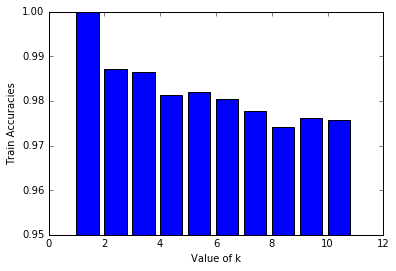

In [121]:
plt.bar(range(1,11),train_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Train Accuracies")
plt.xlabel("Value of k")
plt.show()

### 2.b. knn on the testing data set

In [79]:
%%time
test_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print acc
    test_accuracies.append(acc)
print("Mean accuracy : {}".format(np.mean(train_accuracies)))

0.987315010571
0.976744186047
0.987315010571
0.983086680761
0.980972515856
0.976744186047
0.975687103594
0.975687103594
0.974630021142
0.975687103594


In [ ]:
print("Mean accuracy : {}".format(np.mean(train_accuracies)))

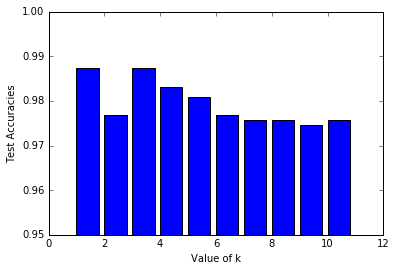

0.97938689217758979

In [82]:
plt.bar(range(1,11),test_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()
np.mean(test_accuracies)

## 3. Naive Bayes Classifier

We use the training data set to learn the conditional probabilities and subsequently use it in predictions.

In [113]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_train)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
metrics.accuracy_score(y_train, y_pred)

0.79162357807652539

In [118]:
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
metrics.accuracy_score(y_test, y_pred)

0.73361522198731499

# Principal Component Analysis 

We apply PCA on the original data (both training and testing set). We then perform both KNN and NB training and evaluation to estimate how much of a difference PCA makes.

### Project onto a lower dimensional subspace

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X_train)

PCA(copy=True, n_components=50, whiten=False)

In [93]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### KNN on the transformed data

In [98]:
%%time
train_accuracies_pca = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_train_pca)
    acc = metrics.accuracy_score(y_train, y_pred)
    print acc
    train_accuracies_pca.append(acc)

1.0
0.990175801448
0.988107549121
0.986556359876
0.987073422958
0.983971044467
0.982936918304
0.982936918304
0.982419855222
0.97880041365
CPU times: user 2.43 s, sys: 0 ns, total: 2.43 s
Wall time: 2.42 s


In [101]:
%%time
test_accuracies_pca = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_test_pca)
    acc = metrics.accuracy_score(y_test, y_pred)
    print acc
    test_accuracies_pca.append(acc)

0.987315010571
0.982029598309
0.989429175476
0.980972515856
0.984143763214
0.980972515856
0.980972515856
0.979915433404
0.975687103594
0.979915433404
CPU times: user 1.33 s, sys: 0 ns, total: 1.33 s
Wall time: 1.32 s


In [115]:
print np.mean(test_accuracies_pca)

0.982135306554


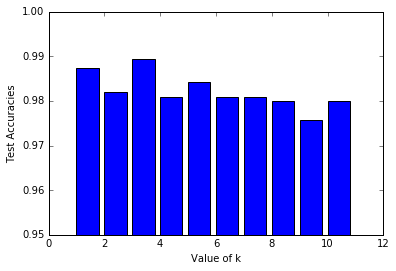

In [114]:
plt.bar(range(1,11),test_accuracies_pca)
plt.ylim(0.95,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()

------------------------------------------------------------

### Naive Bayes on the transformed data 

In [120]:
NB.fit(X_train_pca,y_train)
y_pred = NB.predict(X_test_pca)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
metrics.accuracy_score(y_test, y_pred)

0.94503171247357298